In [1]:
# !pip install psycopg2

In [2]:
# Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import sys

# Define location for db_config file
sys.path.append('..')

# Import database credentials and information
from db_config import pgsql

### Import PostgreSQL Database

In [3]:
# Define database url
db_url = f"postgresql://{pgsql['user']}:{pgsql['passwd']}@{pgsql['host']}:{pgsql['port']}/{pgsql['db']}"

# Create a connection to the database
engine = create_engine(db_url)
connection = engine.connect()

In [4]:
# Create separate dataframes for each table in database by querying all records
# departments = pd.read_sql("SELECT * FROM departments", connection)
# dept_employees = pd.read_sql("SELECT * FROM dept_employees", connection)
# dept_managers = pd.read_sql("SELECT * FROM dept_managers", connection)
# employees = pd.read_sql("SELECT * FROM employees", connection)
salaries = pd.read_sql("SELECT * FROM salaries", connection)
titles = pd.read_sql("SELECT * FROM titles", connection)

### Most Common Salary Ranges - Histogram

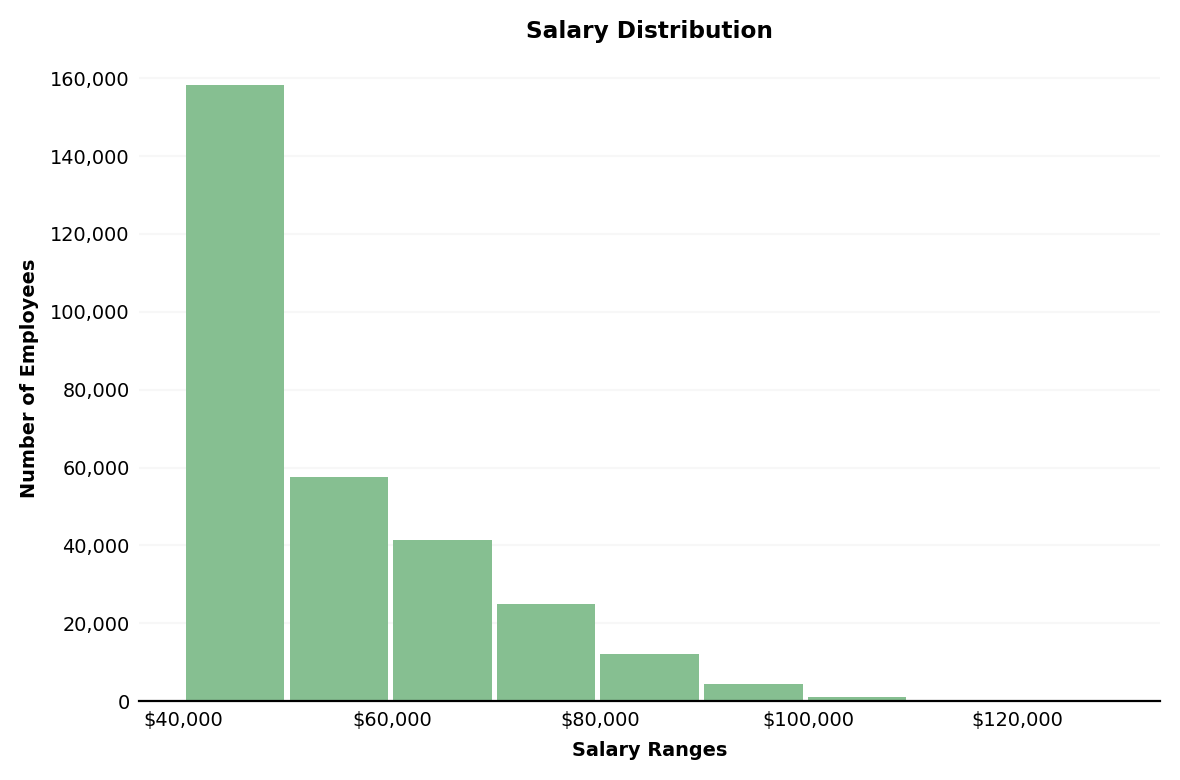

In [5]:
# Set plot size
plt.rcParams['figure.dpi'] = 200

# Generate plot
fig, distr = plt.subplots()

# Define histogram data and settings for bars
distr.hist(salaries['salary'], bins=9, color='#86bf91', rwidth=0.95, zorder=2)

# Define labels and formatting of plot
plt.title(f'Salary Distribution', fontsize='small', weight='bold')
plt.xlabel('Salary Ranges', fontsize='x-small', weight='bold')
plt.ylabel('Number of Employees', fontsize='x-small', weight='bold')
plt.xticks(fontsize='x-small')
plt.yticks(fontsize='x-small')

# Format tick labels
distr.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
distr.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Remove border around plot
distr.spines['right'].set_visible(False)
distr.spines['top'].set_visible(False)
distr.spines['left'].set_visible(False)

# Remove tick marks
distr.tick_params(axis=u'both', which=u'both',length=0)

# Show grid
distr.grid(axis='y', color='whitesmoke', alpha=0.7, zorder=1)

# Save figure
plt.tight_layout()
plt.savefig('Output/salary_distribution.png')

# Show figure
plt.show()

### Average Salary by Title - Bar Chart

In [6]:
# Join titles and salaries dataframes
merged = titles.merge(salaries, how='inner',on='emp_no')

# Truncrate resulting dataframe
avg_salary = merged[['title','salary']]

# Group records by title and calculate average salaries associated with each title
avg_salary = avg_salary.groupby('title').agg({'salary':'mean'})

# Rename column
avg_salary = avg_salary.rename(columns={'salary':'average salary'})
avg_salary

,average salary
title,
Assistant Engineer,48493.204786
Engineer,48539.781423
Manager,51531.041667
Senior Engineer,48506.751806
Senior Staff,58503.286614
Staff,58465.271904
Technique Leader,48580.505772


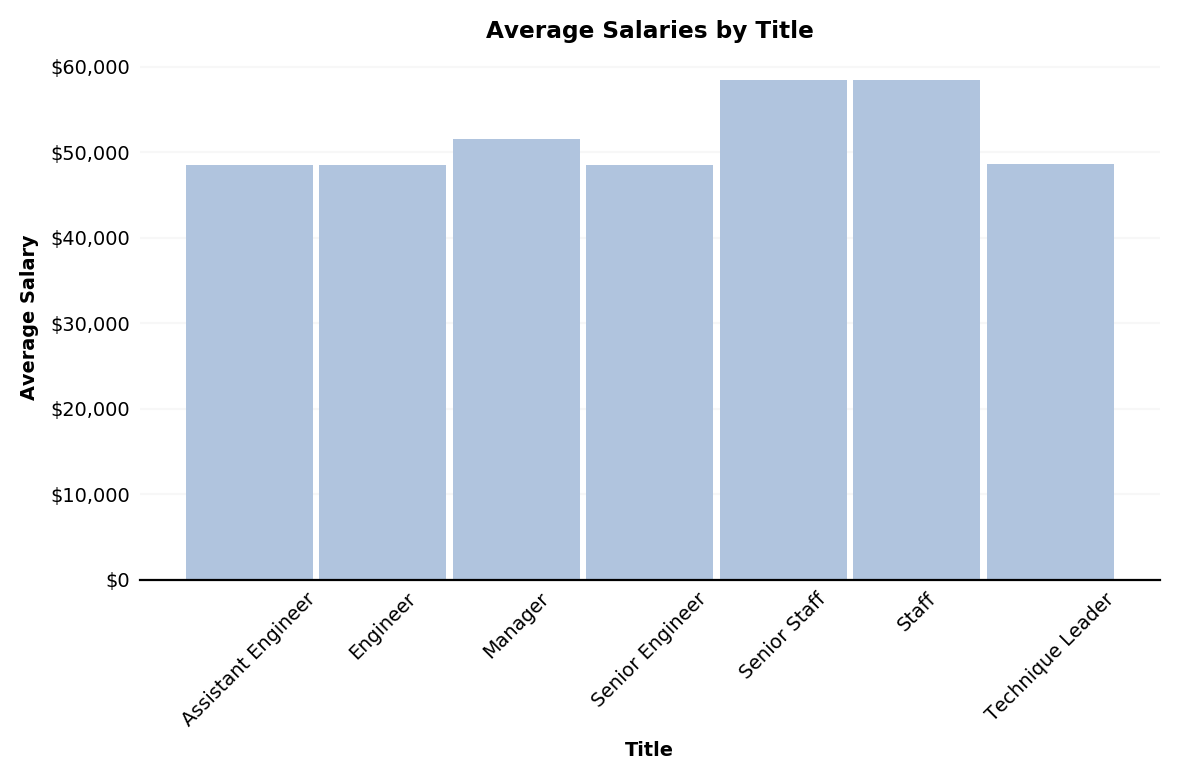

In [7]:
# Set plot size
plt.rcParams['figure.dpi'] = 200

# Generate plot
fig, distr = plt.subplots()

# Define histogram data and settings for bars
distr.bar(avg_salary.index, avg_salary['average salary'], width = 0.95,
          color='lightsteelblue', linewidth=0.2, alpha=1, zorder=2)

# Define labels and formatting of plot
plt.title(f'Average Salaries by Title', fontsize='small', weight='bold')
plt.xlabel('Title', fontsize='x-small', weight='bold')
plt.ylabel('Average Salary', fontsize='x-small', weight='bold')
plt.xticks(fontsize='x-small', rotation = 45)
plt.yticks(fontsize='x-small')

# Format tick labels
distr.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# Remove border around plot
distr.spines['right'].set_visible(False)
distr.spines['top'].set_visible(False)
distr.spines['left'].set_visible(False)

# Remove tick marks
distr.tick_params(axis=u'both', which=u'both',length=0)

# Show grid
distr.grid(axis='y', color='whitesmoke', alpha=.7, zorder=1)

# Save figure
plt.tight_layout()
plt.savefig('Output/average_salaries.png')

# Show figure
plt.show()